In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
!pip3 install catboost

In [2]:
df=pd.read_csv("3PIN.csv")

In [3]:
df.shape

(945, 12)

In [4]:
df=df.drop_duplicates(subset=['Property Details'], keep='last')

In [5]:
df.shape

(445, 12)

In [6]:
df.isnull().sum()

Unnamed: 0           0
Name                 0
Property             0
Type                 0
Rentsale             0
Property Details     0
BHK                  0
Amount               0
Area                 0
Status               0
Source               0
DaysonMkt           10
dtype: int64

In [7]:
df=df[['Property','Type','Rentsale','BHK','Area','Source','DaysonMkt','Amount']]

In [8]:
df.Area= df.Area.apply(lambda x: x.strip())
location_stats = df['Area'].value_counts(ascending=False)
#location_stats

In [9]:
location_stats.values.sum()

445

In [10]:
len(location_stats[location_stats>3])

32

In [11]:
len(location_stats)

123

In [12]:
location_stats_less_than_3 = location_stats[location_stats<=3]
#location_stats_less_than_3

In [13]:
df.Area = df.Area.apply(lambda x: 'other' if x in location_stats_less_than_3 else x)
len(df.Area.unique())

33

In [14]:
def l_u(dataframe, col_name, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + 1.5 * iqr
    lower_limit = quartile1 - 1.5 * iqr
    return lower_limit, upper_limit

In [15]:
df.shape

(445, 8)

In [16]:
bk1=df.loc[(df['Rentsale']=='Rent')]
print('bk1',l_u(bk1,'Amount'))


bk1 (-150000.0, 410000.0)


In [17]:
bk2=df.loc[(df['Rentsale']=='Sale')]
print('bk2',l_u(bk2,'Amount'))


bk2 (-25000000.0, 83000000.0)


In [18]:
s1=bk1.loc[bk1['Amount']<410000.0]


In [19]:
s2=bk2.loc[bk2['Amount']<83000000.0]


In [20]:
df_s= pd.concat([s1,s2])


In [21]:
df_s.shape

(410, 8)

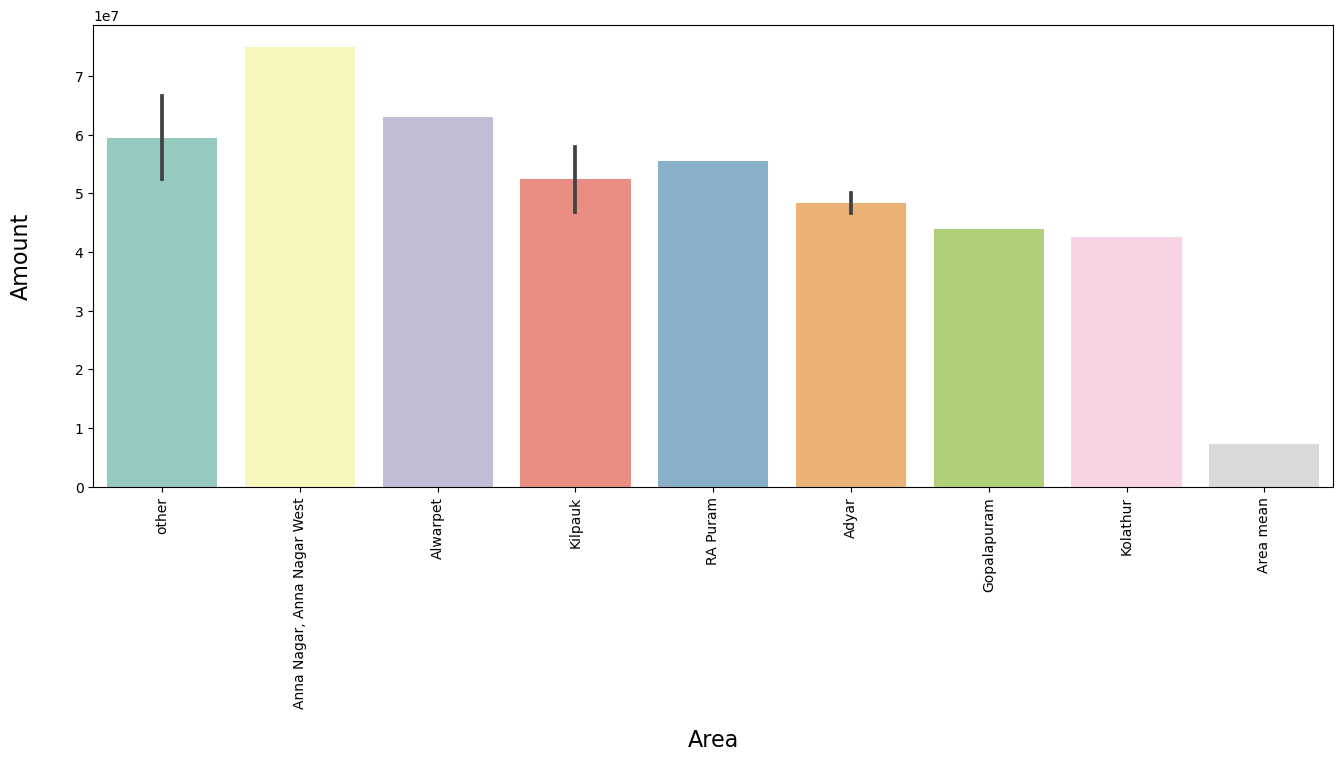

In [22]:

fig, ax = plt.subplots(figsize=(16,6))
#ax = fig.add_subplot(111)
top_area = df_s.sort_values('Amount',ascending=False).head(20)
mean = pd.DataFrame({'Area':['Area mean'], 'Amount':[df_s['Amount'].mean()]})
gdps = pd.concat([top_area[['Area','Amount']],mean],ignore_index=True)

sns.barplot(x='Area',y='Amount',data=gdps, palette='Set3')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

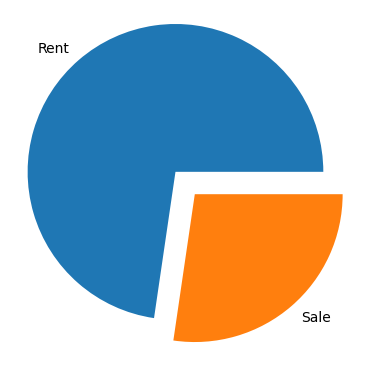

In [23]:
count_rs=df_s['Rentsale'].value_counts()
mylabels = ["Rent", "Sale"]
myexplode = [0.2,0]
plt.pie(x=count_rs,labels=mylabels,explode=myexplode)
plt.show()

[Text(0.5, 0, 'Type'),
 Text(0, 0.5, 'Count of the Types'),
 Text(0.5, 1.0, 'Type of the property ')]

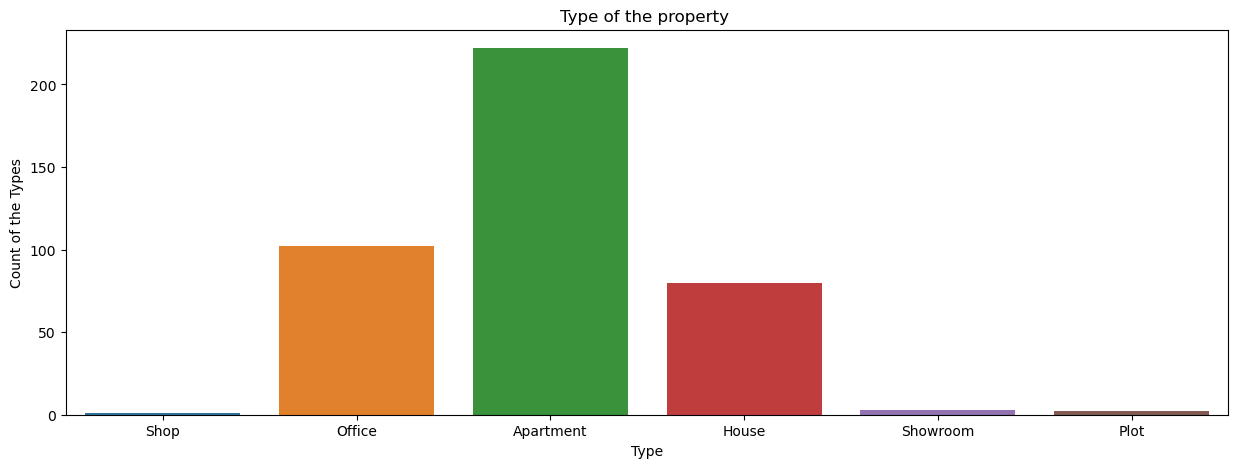

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))
gfg=sns.countplot(x='Type',
              data=df_s, ax=ax)
gfg.set(xlabel ="Type", ylabel = "Count of the Types", title ='Type of the property ')

In [25]:
df_s.shape

(410, 8)

In [26]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_s['property_en']= label_encoder.fit_transform(df_s['Property'])
df_s['Type_en']= label_encoder.fit_transform(df_s['Type'])
df_s['Rentsale_en']= label_encoder.fit_transform(df_s['Rentsale'])
df_s['BHK_en']= label_encoder.fit_transform(df_s['BHK'])
df_s['Area_en']= label_encoder.fit_transform(df_s['Area'])
df_s['Source_en']= label_encoder.fit_transform(df_s['Source'])

In [27]:
df_s

,Property,Type,Rentsale,BHK,Area,Source,DaysonMkt,Amount,property_en,Type_en,Rentsale_en,BHK_en,Area_en,Source_en
0,Commercial,Shop,Rent,2 BHK,other,Magic Bricks,51.0,200000.0,0,4,0,2,32,1
1,Commercial,Office,Rent,3 BHK,Alwarpet,99 acres,58.0,275000.0,0,2,0,3,1,0
3,Commercial,Office,Rent,5 BHK,other,99 acres,23.0,400000.0,0,2,0,5,32,0
4,Commercial,Office,Rent,5 BHK,other,99 acres,3.0,300000.0,0,2,0,5,32,0
5,Commercial,Office,Rent,4 BHK,Adyar,99 acres,51.0,300000.0,0,2,0,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,Residential,Apartment,Sale,3 BHK,other,Magic Bricks,NaN,7500000.0,2,0,1,3,32,1
940,Residential,Apartment,Sale,2 BHK,other,Magic Bricks,NaN,32500000.0,2,0,1,2,32,1
941,Residential,Apartment,Sale,2 BHK,other,Magic Bricks,NaN,8300000.0,2,0,1,2,32,1
942,Residential,Apartment,Sale,3 BHK,RA Puram,Magic Bricks,NaN,22000000.0,2,0,1,3,24,1


In [28]:
df_s['Property'].value_counts()

Residential    300
Commercial     106
Independent      4
Name: Property, dtype: int64

In [29]:
df2 = pd.unique(df_s[['property_en', 'Property']].values.ravel())
print(df2)

[0 'Commercial' 2 'Residential' 1 'Independent']


In [30]:
df_s['Type'].value_counts()

Apartment    222
Office       102
House         80
Showroom       3
Plot           2
Shop           1
Name: Type, dtype: int64

In [31]:
df2 = pd.unique(df_s[['Type_en', 'Type']].values.ravel())
print(df2)

[4 'Shop' 2 'Office' 0 'Apartment' 1 'House' 5 'Showroom' 3 'Plot']


In [32]:
len(df_s['Type'].value_counts())

6

In [33]:
df2 = pd.unique(df_s[['Rentsale_en', 'Rentsale']].values.ravel())
print(df2)

[0 'Rent' 1 'Sale']


In [34]:
len(df_s['Rentsale'].value_counts())

2

In [35]:
df2 = pd.unique(df_s[['BHK_en', 'BHK']].values.ravel())
print(df2)

[2 '2 BHK' 3 '3 BHK' 5 '5 BHK' 4 '4 BHK' 11 'Office' 6 '6 BHK' 0 '1 BHK' 8
 '8 BHK' 7 '7 BHK' 1 '10 BHK' 10 'Land' 9 '9 BHK']


In [36]:
len(df_s['BHK'].value_counts())

12

In [37]:
df2 = pd.unique(df_s[['Area_en', 'Area']].values.ravel())
print(df2)

[32 'other' 1 'Alwarpet' 0 'Adyar' 21 'Nungambakkam' 9 'ECR' 8 'Chetpet'
 17 'Kottivakkam' 13 'Kilpauk' 16 'Korattur' 6 'Ashok Nagar' 11
 'Ekkatuthangal' 27 'Sholinganallur' 31 'Virugambakkam' 28 'T Nagar' 7
 'Besant Nagar' 15 'Kolathur' 22 'OMR' 23 'Porur' 19 'Mylapore' 14
 'Kodambakkam' 24 'RA Puram' 2 'Anna Nagar' 29 'Thiruvanmiyur' 18
 'Kotturpuram' 26 'Saligramam' 25 'Royapettah' 5
 'Anna Nagar, Shanti colony' 4 'Anna Nagar, Anna Nagar West' 12
 'Gopalapuram' 10 'Egmore' 20 'Neelankarai' 3
 'Anna Nagar, Anna Nagar East' 30 'Velachery']


In [38]:
len(df_s['Area'].value_counts())

33

In [39]:
df2 = pd.unique(df_s[['Source_en', 'Source']].values.ravel())
print(df2)

[1 'Magic Bricks' 0 '99 acres']


In [40]:
len(df_s['Source'].value_counts())

2

In [41]:
#df_s= pd.get_dummies(df_s,columns=['Property','Type','Rentsale','BHK','Area','Source'])

In [42]:
df_s.columns

Index(['Property', 'Type', 'Rentsale', 'BHK', 'Area', 'Source', 'DaysonMkt',
       'Amount', 'property_en', 'Type_en', 'Rentsale_en', 'BHK_en', 'Area_en',
       'Source_en'],
      dtype='object')

In [43]:
final_df=df_s[[ 'property_en', 'Type_en', 'Rentsale_en', 'BHK_en', 'Area_en',
       'Source_en','DaysonMkt', 'Amount']]

In [60]:
final_df.isnull().sum()

property_en     0
Type_en         0
Rentsale_en     0
BHK_en          0
Area_en         0
Source_en       0
DaysonMkt      10
Amount          0
dtype: int64

<AxesSubplot:ylabel='Density'>

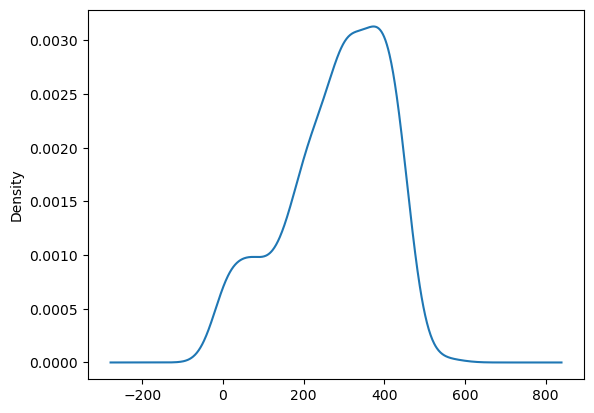

In [44]:
final_df['DaysonMkt'].plot(kind='kde')

In [45]:
x=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]

In [47]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman',random_state=0)
x=pd.DataFrame(imp.fit_transform(x))

[IterativeImputer] Completing matrix with shape (410, 7)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.02
[IterativeImputer] Change: 65.90853666003312, scaled tolerance: 0.56 
[IterativeImputer] Ending imputation round 2/10, elapsed time 0.02
[IterativeImputer] Change: 0.0, scaled tolerance: 0.56 
[IterativeImputer] Early stopping criterion reached.


In [48]:
import plotly.io as pio
plotly_template = pio.templates["plotly"]
pio.templates["draft"] = plotly_template
additional_colors = ("#ff057e", "#690f54", "#bf6524", "#176b15")
basic_colors = pio.templates["draft"]["layout"]["colorway"]
h=pio.templates["draft"]["layout"]["colorway"] = basic_colors + additional_colors


In [50]:
final_df.columns

Index(['property_en', 'Type_en', 'Rentsale_en', 'BHK_en', 'Area_en',
       'Source_en', 'DaysonMkt', 'Amount'],
      dtype='object')

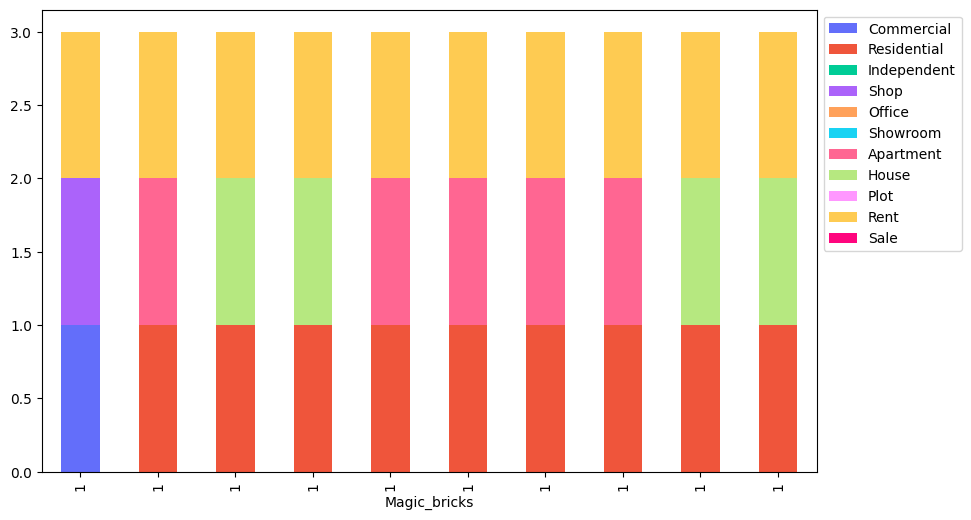

In [ ]:
newdf=final_df.loc[(final_df['Magic_bricks']==1.0)]
plot_data = newdf.head(10)[['Commercial', 'Residential','Independent','Shop', 'Office', 'Showroom', 'Apartment', 'House', 'Plot','Magic_bricks','Rent', 'Sale']]
plot_data = plot_data.set_index('Magic_bricks')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6),color =h)
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

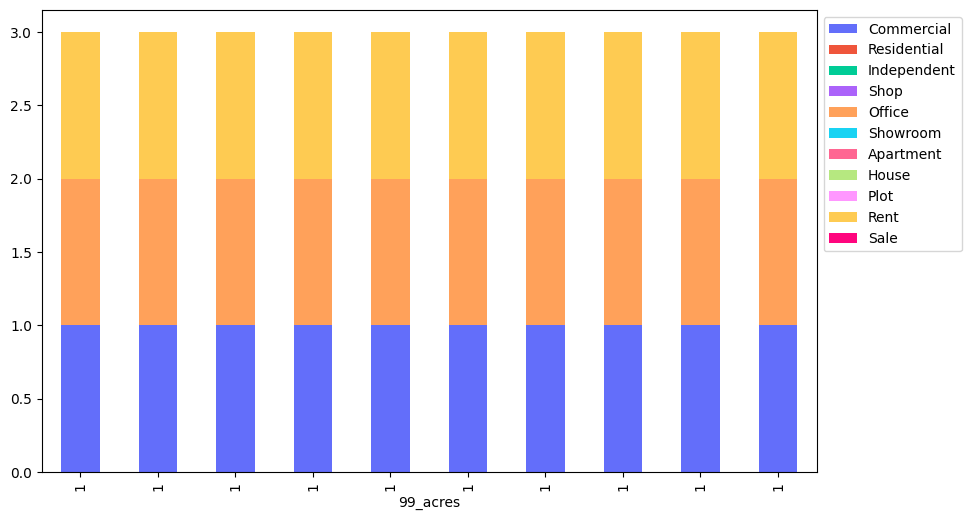

In [ ]:
newdf=final_df.loc[(final_df['99_acres']==1.0)]
plot_data = newdf.head(10)[['Commercial', 'Residential','Independent','Shop', 'Office', 'Showroom', 'Apartment', 'House', 'Plot','99_acres','Rent', 'Sale']]
plot_data = plot_data.set_index('99_acres')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6),color=h)
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

In [51]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [52]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
rand_reg.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [53]:
y_pred_rfr = rand_reg.predict(x_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred_rfr.reshape(len(y_pred_rfr),1), y_test.reshape(len(y_test),1)),1))

In [54]:
from sklearn.metrics import r2_score
rand_score=r2_score(y_test, y_pred_rfr)
print(rand_score)

0.6898986075404117


In [55]:
N=y_test.shape[0]
p=3
x = (1-rand_score)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.6779716309073505


In [56]:
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error
rfr_mae=mean_absolute_error(y_test, y_pred_rfr)
rfr_mse=mean_squared_error(y_test, y_pred_rfr)
rfr_rmse=sqrt(rfr_mse)
print(rfr_mae)
print(rfr_mse)
print(rfr_rmse)

3777174.3902439023
72764568389390.25
8530215.025976207


Hyper tuning Random regressor

In [57]:
from pprint import pprint
rf=RandomForestRegressor()
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [58]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [59]:
rf = RandomForestRegressor()
rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_tuned.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [60]:
y_pred_rfs = rf_tuned.predict(x_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred_rfs.reshape(len(y_pred_rfs),1), y_test.reshape(len(y_test),1)),1))

In [74]:
from sklearn.metrics import r2_score
rtuned_score=r2_score(y_test, y_pred_rfs)
print(rtuned_score)

0.7320312667945108


In [75]:
N=y_test.shape[0]
p=3
x = (1-rtuned_score)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7217247770558382


In [76]:
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error
rt_mae=mean_absolute_error(y_test, y_pred_rfs)
rt_mse=mean_squared_error(y_test, y_pred_rfs)
rt_rmse=sqrt(rt_mse)
print(rt_mae)
print(rt_mse)
print(rt_rmse)

3187177.1748408
62878238175244.91
7929579.949483132


XGBOOST

In [80]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [81]:
xgb_r.fit(x_train,y_train)
pred_xgb = xgb_r.predict(x_test)

[17:13:06] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [82]:
np.set_printoptions(precision=2)
#print(np.concatenate((pred_xgb.reshape(len(pred_xgb),1), y_test.reshape(len(y_test),1)),1))

In [83]:
from sklearn import metrics
xgb_score=metrics.r2_score(y_test, pred_xgb)
xgb_score

0.6655875143077542

In [84]:
N=y_test.shape[0]
p=3
x = (1-xgb_score)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.6527254956272832


In [85]:
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error
xgb_mae=mean_absolute_error(y_test, pred_xgb)
xgb_mse=mean_squared_error(y_test, pred_xgb)
xgb_rmse=sqrt(xgb_mse)
print(xgb_mae)
print(xgb_mse)
print(xgb_rmse)

3699523.676686357
78469109707691.73
8858279.161761144


In [86]:
from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor(random_state = 0)
dec_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [88]:
y_pred_de = dec_reg.predict(x_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred_de.reshape(len(y_pred_de),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score
dec_score=r2_score(y_test, y_pred_de)
dec_score

In [ ]:
N=y_test.shape[0]
p=3
x = (1-dec_score)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.36077286199936087


In [90]:
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error
dec_mae=mean_absolute_error(y_test, y_pred_de)
dec_mse=mean_squared_error(y_test, y_pred_de)
dec_rmse=sqrt(dec_mse)
print(dec_mae)
print(dec_mse)
print(dec_rmse)

4367268.292682927
105881713634146.34
10289884.043765817


CatBoost

In [91]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)
cbr.fit(x_train, y_train)

0:	learn: 7512047.1201078	total: 46.4ms	remaining: 46.4ms
1:	learn: 6945448.2061254	total: 47.3ms	remaining: 0us


In [92]:
y_pred_cb = cbr.predict(x_test)
np.set_printoptions(precision=2)
#print(np.concatenate((y_pred_cb.reshape(len(y_pred_cb),1), y_test.reshape(len(y_test),1)),1))

In [93]:
from sklearn.metrics import r2_score
cbr_score=r2_score(y_test, y_pred_cb)
cbr_score

0.7560402367686695

In [94]:
N=y_test.shape[0]
p=3
x = (1-cbr_score)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.7466571689520798


In [95]:
from math import sqrt
from sklearn.metrics import mean_absolute_error,mean_squared_error
cbr_mae=mean_absolute_error(y_test, y_pred_cb)
cbr_mse=mean_squared_error(y_test, y_pred_cb)
cbr_rmse=sqrt(cbr_mse)
print(cbr_mae)
print(cbr_mse)
print(cbr_rmse)

2996786.9325119555
57244589374808.914
7566015.422585981


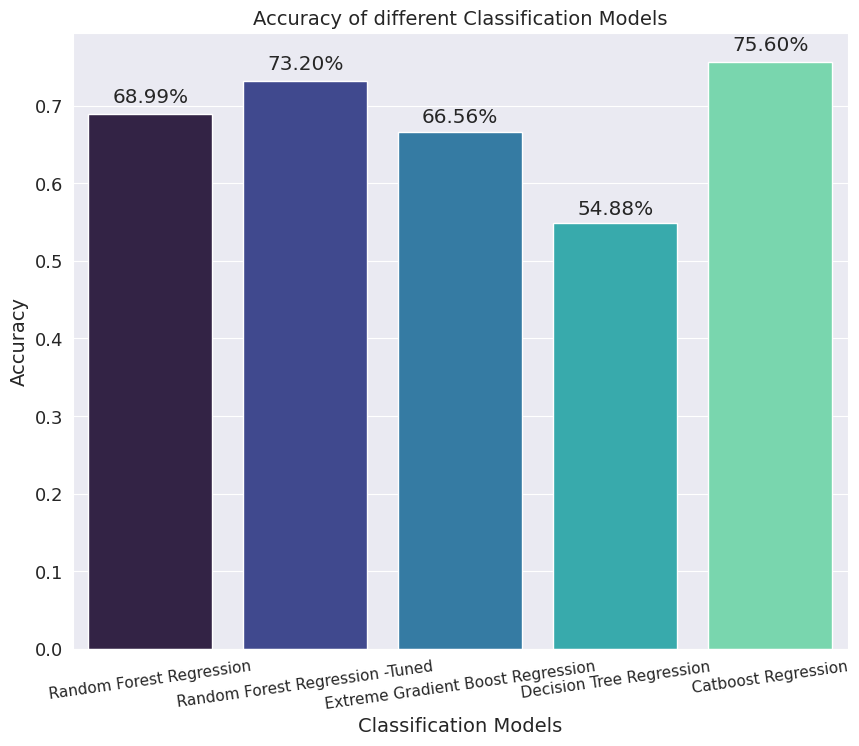

In [97]:
mylist=[]
mylist2=[]
mylist.append(rand_score)
mylist2.append("Random Forest Regression")
mylist.append(rtuned_score)
mylist2.append("Random Forest Regression -Tuned")
mylist.append(xgb_score)
mylist2.append("Extreme Gradient Boost Regression")
mylist.append(dec_score)
mylist2.append("Decision Tree Regression")
mylist.append(cbr_score)
mylist2.append("Catboost Regression")

plt.rcParams['figure.figsize']=5,5
sns.set_style("darkgrid")
plt.figure(figsize=(10,8))
ax = sns.barplot(x=mylist2, y=mylist, palette = "mako", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 14 )
plt.ylabel("Accuracy", fontsize = 14)
plt.title("Accuracy of different Classification Models", fontsize = 14)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [98]:
import pickle
file = open('3PIN.pkl', 'wb')
pickle.dump(cbr, file)